# PERBANDINGAN BULAN ARAH ANGIN TERTINGGI
## Januari 2023

In [1]:
import pandas as dp
import numpy as np
import math
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

#File Synoptik dan AWS
dft = dp.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/DATA/arah angin tertinggi.csv')
df = dp.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [2]:
#Mengolah Data AWS
df=df.drop(df.index[0])
#Filter data AWS berdasarkan tanggal
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
df['wd_avg'] = df['wd_avg'].astype(float)
filter=df.groupby(df.Tanggal.dt.date)['wd_avg'].max()
filter_sorted = filter.sort_index(ascending=True)
df1=dp.DataFrame(filter_sorted)
df1=df1.drop(df1.index[-1])
df1.reset_index(drop=False, inplace=True)
df1=df1.drop(columns=['Tanggal'])
if len(df1)==31:
  tgl=[]
  for i in range(32):
    tgl.append(i)
  tgl.remove(0)
elif len(df1)==30:
  tgl=[]
  for i in range(31):
    tgl.append(i)
  tgl.remove(0)
elif len(df1)==29:
  tgl=[]
  for i in range(30):
    tgl.append(i)
  tgl.remove(0)
else:
  tgl=[]
  for i in range(29):
    tgl.append(i)
  tgl.remove(0)
df1['tgl']=tgl

#Menambahkan arah mata angin
v=df1['wd_avg'].values.tolist()
l=[]
for i in v:
  if not math.isnan(i):
    if 22.5 <= i <= 67.5:
      l.append("NE")
    elif 67.5 <= i <= 112.5:
      l.append("E")
    elif 112.5<= i <= 157.5:
      l.append("SE")
    elif 157.5 <= i <=202.5:
      l.append("S")
    elif 202.5 <= i <=247.5:
      l.append("SW")
    elif 247.5 <= i <=292.5:
      l.append("W")
    elif 292.5 <= i <=337.5:
      l.append("NW")
    else :
      l.append("N")
  else :
    l.append(" ")

df1.insert(1,'Arah_Mata_Angin', l)
del df1['wd_avg']
df1.replace(' ', dp.NA, inplace=True)

#Mengolah Data Synoptik
dft = dft.drop(dft.index[-1])
dft.rename(columns={'Jan':'Arah_Mata_Angin'}, inplace=True)

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Chi-square statistic: 243.99999999999997
P-value: 0.41606805223429527
Degrees of freedom: 240
Expected frequencies:
 [[0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689 0.03278689 0.03278689 0.03278689 0.03278689 0.03278689
  0.03278689]
 [0.01639344 0.01639344 0.01639344 0.01639344 0.01639344 0.01639344
  0.01639344 0.01639344 0.01639344 0.01639344 0.01639344 0.0163934

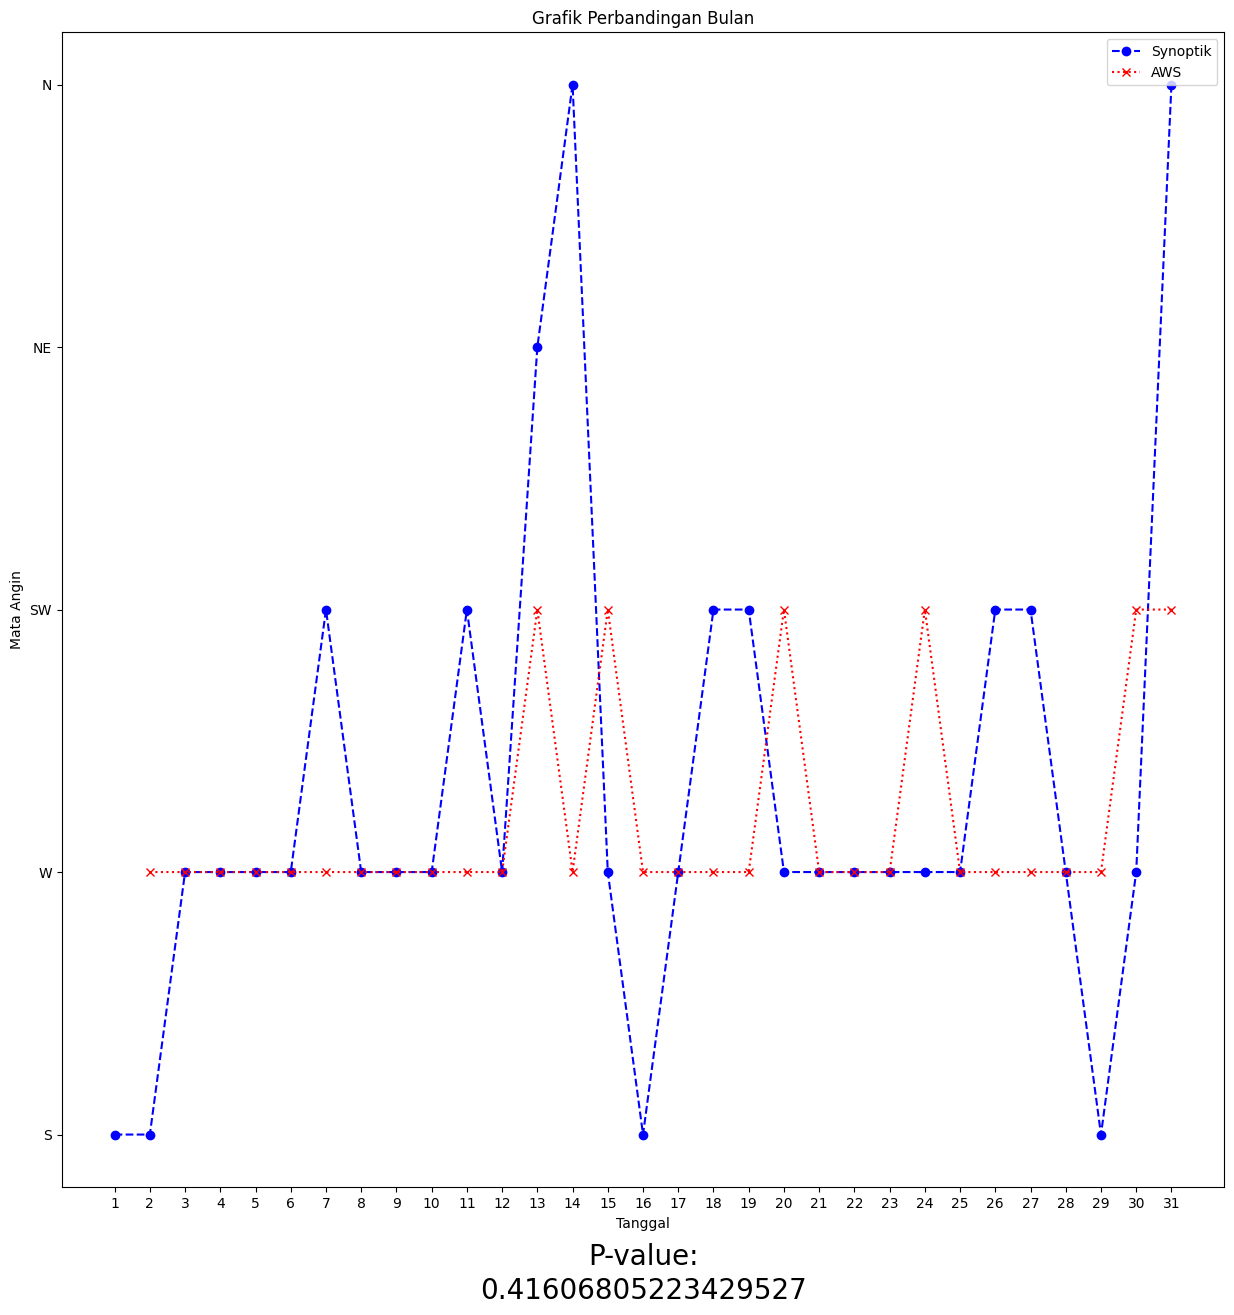

In [3]:
#Cek NaN
#rows_with_nan4 = df1.applymap(" ").any(axis=1)
rows_with_nan4 = df1.isna().any(axis=1)-
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1['tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Hapus tanggal synoptik yang di AWS adalah NaN
dft=dft.dropna(axis=1)
filter_hapus4 = dft.isin(c4).any(axis=1)
df_cleaned14 = dft.drop(dft[filter_hapus4].index)

# Menggabungkan DataFrames
combined_data = dp.concat([df_cleaned14, df_cleaned_4])

# Membuat tabel kontingensi dari data yang digabungkan
contingency_table = dp.crosstab(combined_data['Arah_Mata_Angin'], combined_data['tgl'])

# Melakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Menentukan kesimpulan
alpha = 0.05  # Ambil tingkat signifikansi yang diinginkan
if p < alpha:
    conclusion = "Ada perbedaan yang signifikan antara kedua data."
else:
    conclusion = "Tidak ada perbedaan yang signifikan antara kedua data."

print(conclusion)

# Menggambar plot diagram batang
print("Grafik Perbandingannya:")
dft['Arah_Mata_Angin']=dft['Arah_Mata_Angin'].astype(str)
df1['Arah_Mata_Angin']=df1['Arah_Mata_Angin'].astype(str)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Bulan')
plt.plot(dft['tgl'], dft['Arah_Mata_Angin'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['tgl'], df1['Arah_Mata_Angin'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Mata Angin')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)

if p<alpha:
  plt.text(0.5, -0.09, p, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)

plt.show()
